# Purpose:
- Calculate clusterig index across learning
- First, from the test sessions, for all 7 angles
- Then, from the training sessions
- Also look at the change bewteen neighboring sessions using matched cells

In [2]:
import numpy as np
import pandas as pd
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import utils.matched_roi as mr
import utils.merged_df_annotation as mda
import utils.population_activity as pa
import utils.lda_angle_discrim as lda_angle
from importlib import reload

base_dir = Path(r'E:\TPM\JK\h5')

expert_mice_df = pd.read_csv(base_dir / 'expert_mice.csv', index_col=0)
use_mice_df = expert_mice_df.loc[expert_mice_df['depth_matched'].astype(bool) & 
                                 ~expert_mice_df['processing_error'].astype(bool) &
                                 ((expert_mice_df.session_type == 'training') |
                                  (expert_mice_df.session_type.str.contains('test')))]

mice = [25,27,30,36,39,52]
test_sessions = [[4,19], [3,8], [3,21], [1,17], [1,23], [3,21]]

# Calculating clustering index
- 1/k * (sum)(from i=0 to k) ( (between-group distance) - (within-group distance) / (between-group distance) + (within-group distance) )

In [6]:
mouse = 25
volume = 1
top_plane = 1 if volume==1 else 5
# sessions = np.array([int(s) for s in use_mice_df.query('mouse==@mouse and plane==@top_plane').session.values])
# si = 0
# session = sessions[si]
session = 4

touch_window='before_answer'
spk_norm='std'
varexp_threshold=0.05
post_touch_frames=1

per_touch_response_xr_fit, per_touch_response_df, per_touch_response_xr = \
    pa.get_touch_response_xr_varexp_threshold(base_dir, mouse, top_plane, session,
                                              touch_window=touch_window,
                                              spk_norm=spk_norm,
                                              varexp_threshold=varexp_threshold,
                                              post_touch_frames=post_touch_frames)
    

In [7]:
per_touch_response_df.pole_angle.unique()

array([ 90, 105,  45, 135,  60, 120,  75], dtype=uint16)

In [11]:
dim_nums = np.arange(3,17,2)
angles = per_touch_response_df.pole_angle.unique()
pca = PCA()
pca.fit_transform(per_touch_response_xr_fit)
dim_num = 3
pca.components_[:,:dim_num]


array([[ 5.56481332e-02, -7.60418177e-03,  3.56143713e-03],
       [-3.43755111e-02, -7.62239099e-04,  9.19797271e-03],
       [-3.29821110e-02,  2.80038416e-02, -7.62471557e-03],
       [ 3.02765314e-02, -5.82194924e-02,  2.44243443e-03],
       [ 1.36616573e-01, -2.82936096e-02,  1.42864883e-02],
       [ 9.31855068e-02,  7.67558813e-04,  1.61643475e-02],
       [ 1.46282673e-01, -5.52749634e-02,  1.93022788e-02],
       [ 2.38455404e-02, -1.55182257e-02, -3.99038196e-03],
       [ 8.30101967e-03, -3.30216102e-02,  1.42901056e-02],
       [-2.08099000e-02, -5.01942374e-02, -3.09565775e-02],
       [-8.28776509e-03, -7.51315942e-03, -1.69206448e-02],
       [ 2.88307592e-02,  3.08255069e-02,  5.01671508e-02],
       [-2.05890834e-02, -2.66447961e-02,  1.32993609e-03],
       [ 6.80522844e-02, -5.90586439e-02,  1.27171054e-02],
       [ 1.16798459e-02, -2.80511901e-02, -5.60294557e-03],
       [-2.16790512e-02,  2.61545479e-02, -6.36529550e-03],
       [-7.07684159e-02, -9.69012827e-03

In [14]:
per_touch_response_df.columns

Index(['trialNum', 'pole_angle', 'correct', 'wrong', 'miss', 'num_touch'], dtype='object')

In [15]:
per_touch_response_xr_fit.dims

('trialNum', 'cell_id')

(23, 154)
(35, 154)
(31, 154)
(51, 154)
(35, 154)
(22, 154)
(26, 154)


Text(0.5, 0, 'PC3')

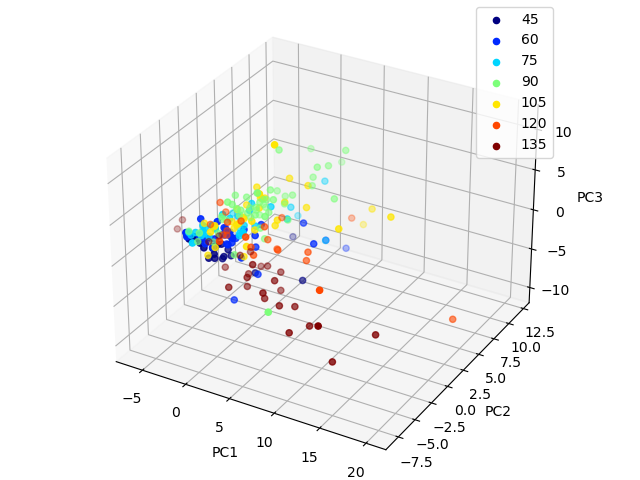

In [18]:
%matplotlib widget
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

angles = np.unique(per_touch_response_df.pole_angle)
colors = plt.cm.jet(np.linspace(0,1,len(angles)))
for ai, angle in enumerate(angles):
    angle_tns = per_touch_response_df[per_touch_response_df.pole_angle==angle].trialNum.values
    responses_angle = per_touch_response_xr_fit.sel(trialNum=angle_tns)
    print(responses_angle.shape)
    pc = pca.transform(responses_angle)
    ax.scatter(pc[:,0], pc[:,1], pc[:,2], color=colors[ai], label=angle)
ax.legend()
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')